## Neural networks learning

This exercise is described in [ex4.pdf](data/ml-ex4/ex4.pdf).

In [1]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

%matplotlib inline

In [2]:
# Load the hand-written digits dataset
digits = sio.loadmat('data/ml-ex4/ex4data1.mat')

In [3]:
# Digit image data (5000 images with 400 features/pixels)
X = digits['X']

# Digit classes (1-10) where digit 0 is assigned class 10
y = digits['y'].ravel()

Sample images are shown in [Exercise 3 notebook](ml-ex3.ipynb).

In [4]:
# Create a feed-forward neural network with a single hidden layer 
# with 25 logistic units. Input layer size is derived from number
# of features in X. Output layer size is derived from number of 
# classes in y.
clf = MLPClassifier((25,), activation='logistic', solver='lbfgs')
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(25,), solver='lbfgs')

In [5]:
# Classification accuracy on training set
clf.score(X, y)

0.9998

In [6]:
# For cross validation, use two stratified randomized folds 
# where the test set size = 0.1 * dataset size. Statified 
# means that the folds are made by preserving the percentage 
# of samples for each class.
cv = StratifiedShuffleSplit(2, test_size=0.1, random_state=0)

# Run a grid search to find the best value values for regularization 
# parameter alpha using the cross validator (cv) defined above.
gs = GridSearchCV(clf, param_grid={'alpha':[1e-2, 1e-1, 1e0, 1e1]}, cv=cv)
gs.fit(X, y)

/Users/sadeed/opt/anaconda3/envs/my37env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sadeed/opt/anaconda3/envs/my37env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sadeed/opt/anaconda3/envs/my37env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: C

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.1,
            train_size=None),
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(25,), solver='lbfgs'),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]})

In [7]:
# Show the cross validation results in a pandas data frame
# - column mean_train_score: mean classification accuracy on training set
# - column mean_test_score: mean classification accuracy on test set
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.212009,0.309099,0.003154,0.001260,0.01,{'alpha': 0.01},0.908,0.928,0.918,0.010,4
1,1.721634,0.257518,0.001347,0.000012,0.1,{'alpha': 0.1},0.924,0.934,0.929,0.005,2
2,2.127094,0.158363,0.001581,0.000011,1,{'alpha': 1.0},0.940,0.950,0.945,0.005,1
3,2.709179,0.106629,0.002004,0.000489,10,{'alpha': 10.0},0.914,0.930,0.922,0.008,3


In [8]:
# Best classifier is the neural network with alpha=1.0
clf_best = gs.best_estimator_
clf_best

MLPClassifier(activation='logistic', alpha=1.0, hidden_layer_sizes=(25,),
              solver='lbfgs')

In [9]:
# Classification accuracy on training set
clf_best.score(X, y)

0.9976

In [10]:
# Obtain weight matrix between input and hidden layer
# (input layer size = 400, hidden layer size = 25)
Theta1 = clf_best.coefs_[0].T
Theta1.shape

(25, 400)

<Figure size 432x288 with 0 Axes>

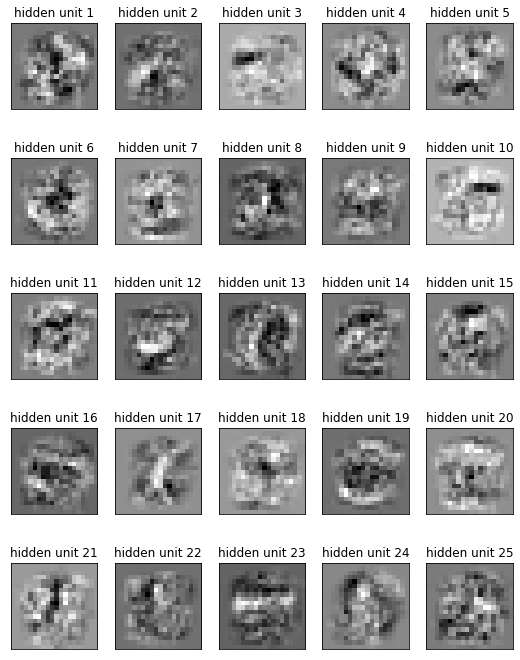

In [11]:
# Visualize input weights into hidden units (400 per hidden unit)
n_rows = 5
n_cols = 5

plt.subplots_adjust(top=.9, hspace=.4)
plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))

for i, row in enumerate(Theta1):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(row.reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title(f'hidden unit {i + 1}')
    plt.xticks(())
    plt.yticks(())